## Housing Price Prediction 

### For Infopillar Solution

### By Apurva Acharya

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.

We perform Exploratory data analysis to find the correlation between various features, and the association between an introduced Target Variable and attributes


### Import modules and Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [3]:
from sklearn.datasets import load_boston
boston=load_boston()

In [4]:
data=pd.DataFrame(boston.data)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
columns=['CRIM','ZN', 'INDUS', 'CHAS' ,'NOX' ,'RM' ,'AGE', 'DIS' ,'RAD' ,'TAX', 'PTRATIO','B' ,'LSTAT']

### Giving columns feature names

In [8]:
data.columns=columns

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


The dataset has **506 rows and 13 columns.**

In [11]:
#Introducing Target Column
data['house_price']=boston.target

In [12]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'house_price'],
      dtype='object')

Now the dataset has **14 columns.**

In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Looking for null values

In [14]:
data.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
house_price    0
dtype: int64

There are no null values in the dataset.

### Looking for outliers

<AxesSubplot:>

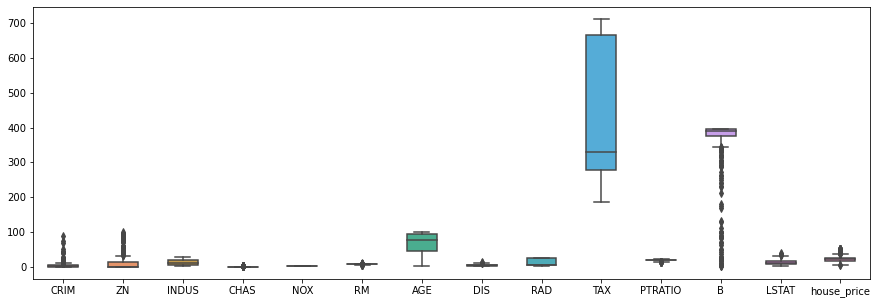

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,width=0.5)

Outliers can be seen in the **CRIM, ZN, DIS, B** columns.

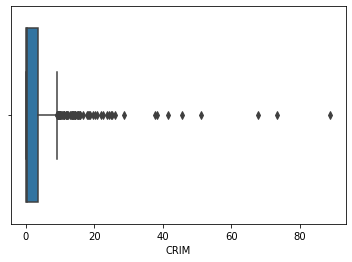

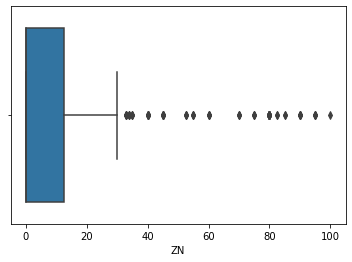

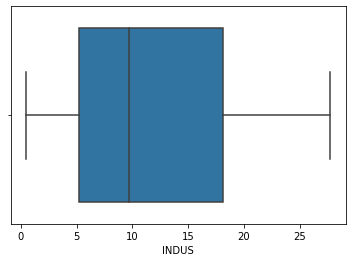

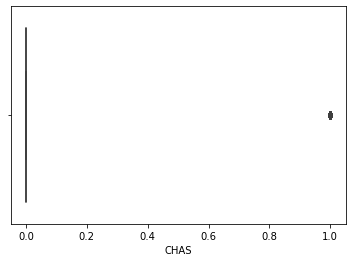

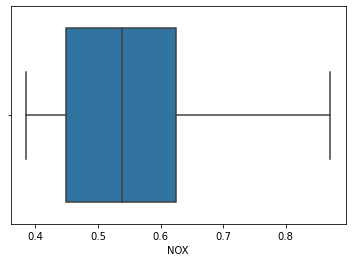

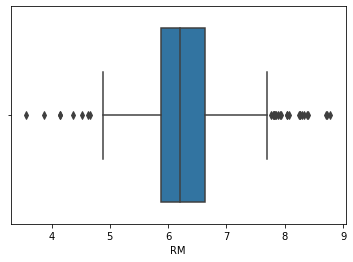

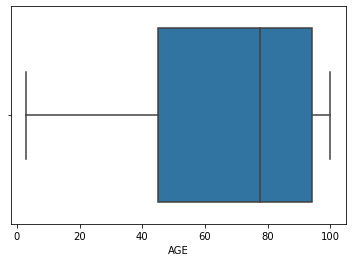

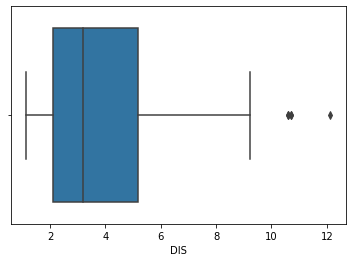

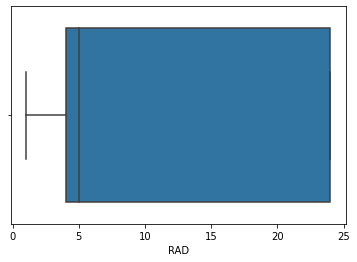

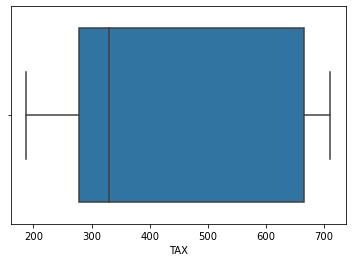

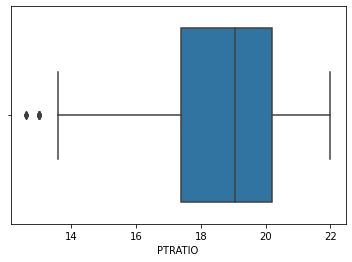

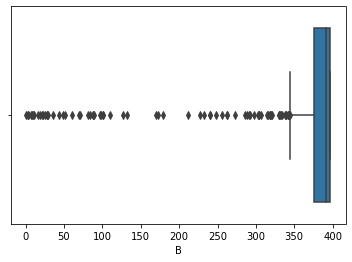

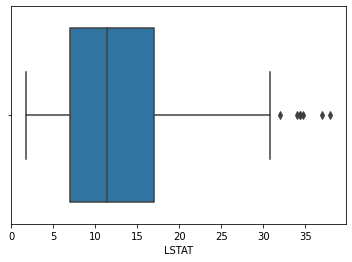

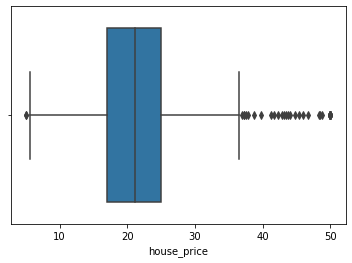

In [16]:
for col in data:
    plt.figure()
    sns.boxplot(data[col])

### Removing the outliers

In [17]:
data[(data['CRIM']>35)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8
427,37.6619,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52,10.9


In [18]:
data.drop([380,398,404,405,410,44,418,427])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [19]:
Q1 = np.percentile(data['ZN'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['ZN'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['ZN'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['ZN'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ",data.shape)

Old Shape:  (506, 14)
New Shape:  (438, 14)


In [20]:
data[(data['B']<200)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.6
145,2.37934,0.0,19.58,0.0,0.871,6.130,100.0,1.4191,5.0,403.0,14.7,172.91,27.80,13.8
146,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
155,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,15.6
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,88.63,16.14,13.1
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
409,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78,27.5
410,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22,17.2
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9


In [21]:
data.drop([102,145,146,155,156,367,409,410,411,412,414,415,416,417,418,419,423,42,425,426,427,428,429,130,431,432,433,434,435,436,437,438,445,450,454,454,455,456,457,466],inplace=True)

In [22]:
data[(data['LSTAT']>30)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
48,0.25387,0.0,6.91,0.0,0.448,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81,14.4
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81,7.2
387,22.59710,0.0,18.10,0.0,0.700,5.000,89.5,1.5184,24.0,666.0,20.2,396.90,31.99,7.4
388,14.33370,0.0,18.10,0.0,0.700,4.880,100.0,1.5895,24.0,666.0,20.2,372.92,30.62,10.2
398,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0


In [23]:
data.drop([48,141,373,374,384,385,387,388,398],inplace=True)

In [24]:
data.shape

(390, 14)

Now the dataset has **390 rows and 14 columns.**

### Univariate Analysis

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'house_price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

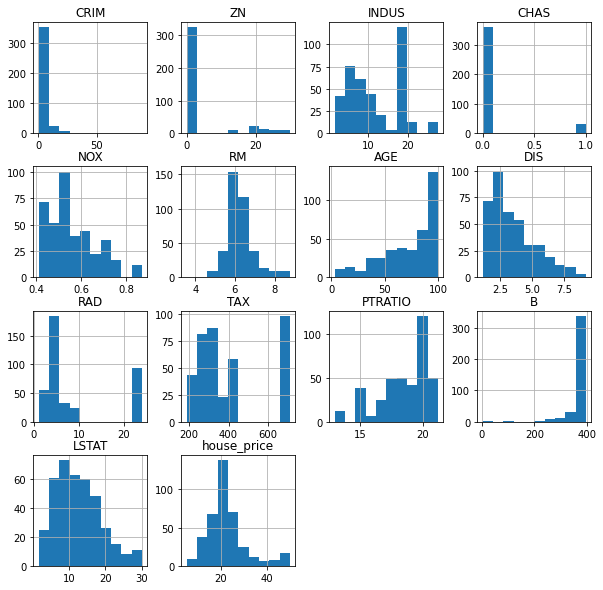

In [25]:
data.hist(figsize=(10,10))

### Correlation map

<AxesSubplot:>

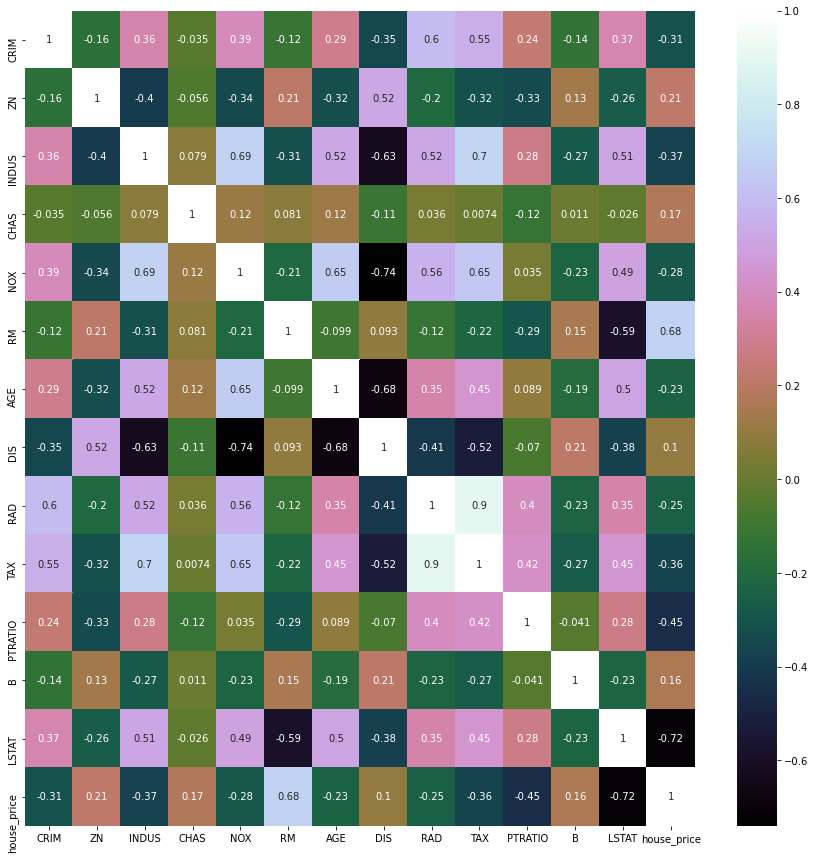

In [26]:
plt.figure(figsize=(15,15))
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='cubehelix')

From the above heatmap, we see that there is a strong **negative correlation** between **LSTAT, PTRATIO, NOX, CRIM, INDUS** and **house price.**

Also there is a strong positive correlation between **RM** and **house price.**

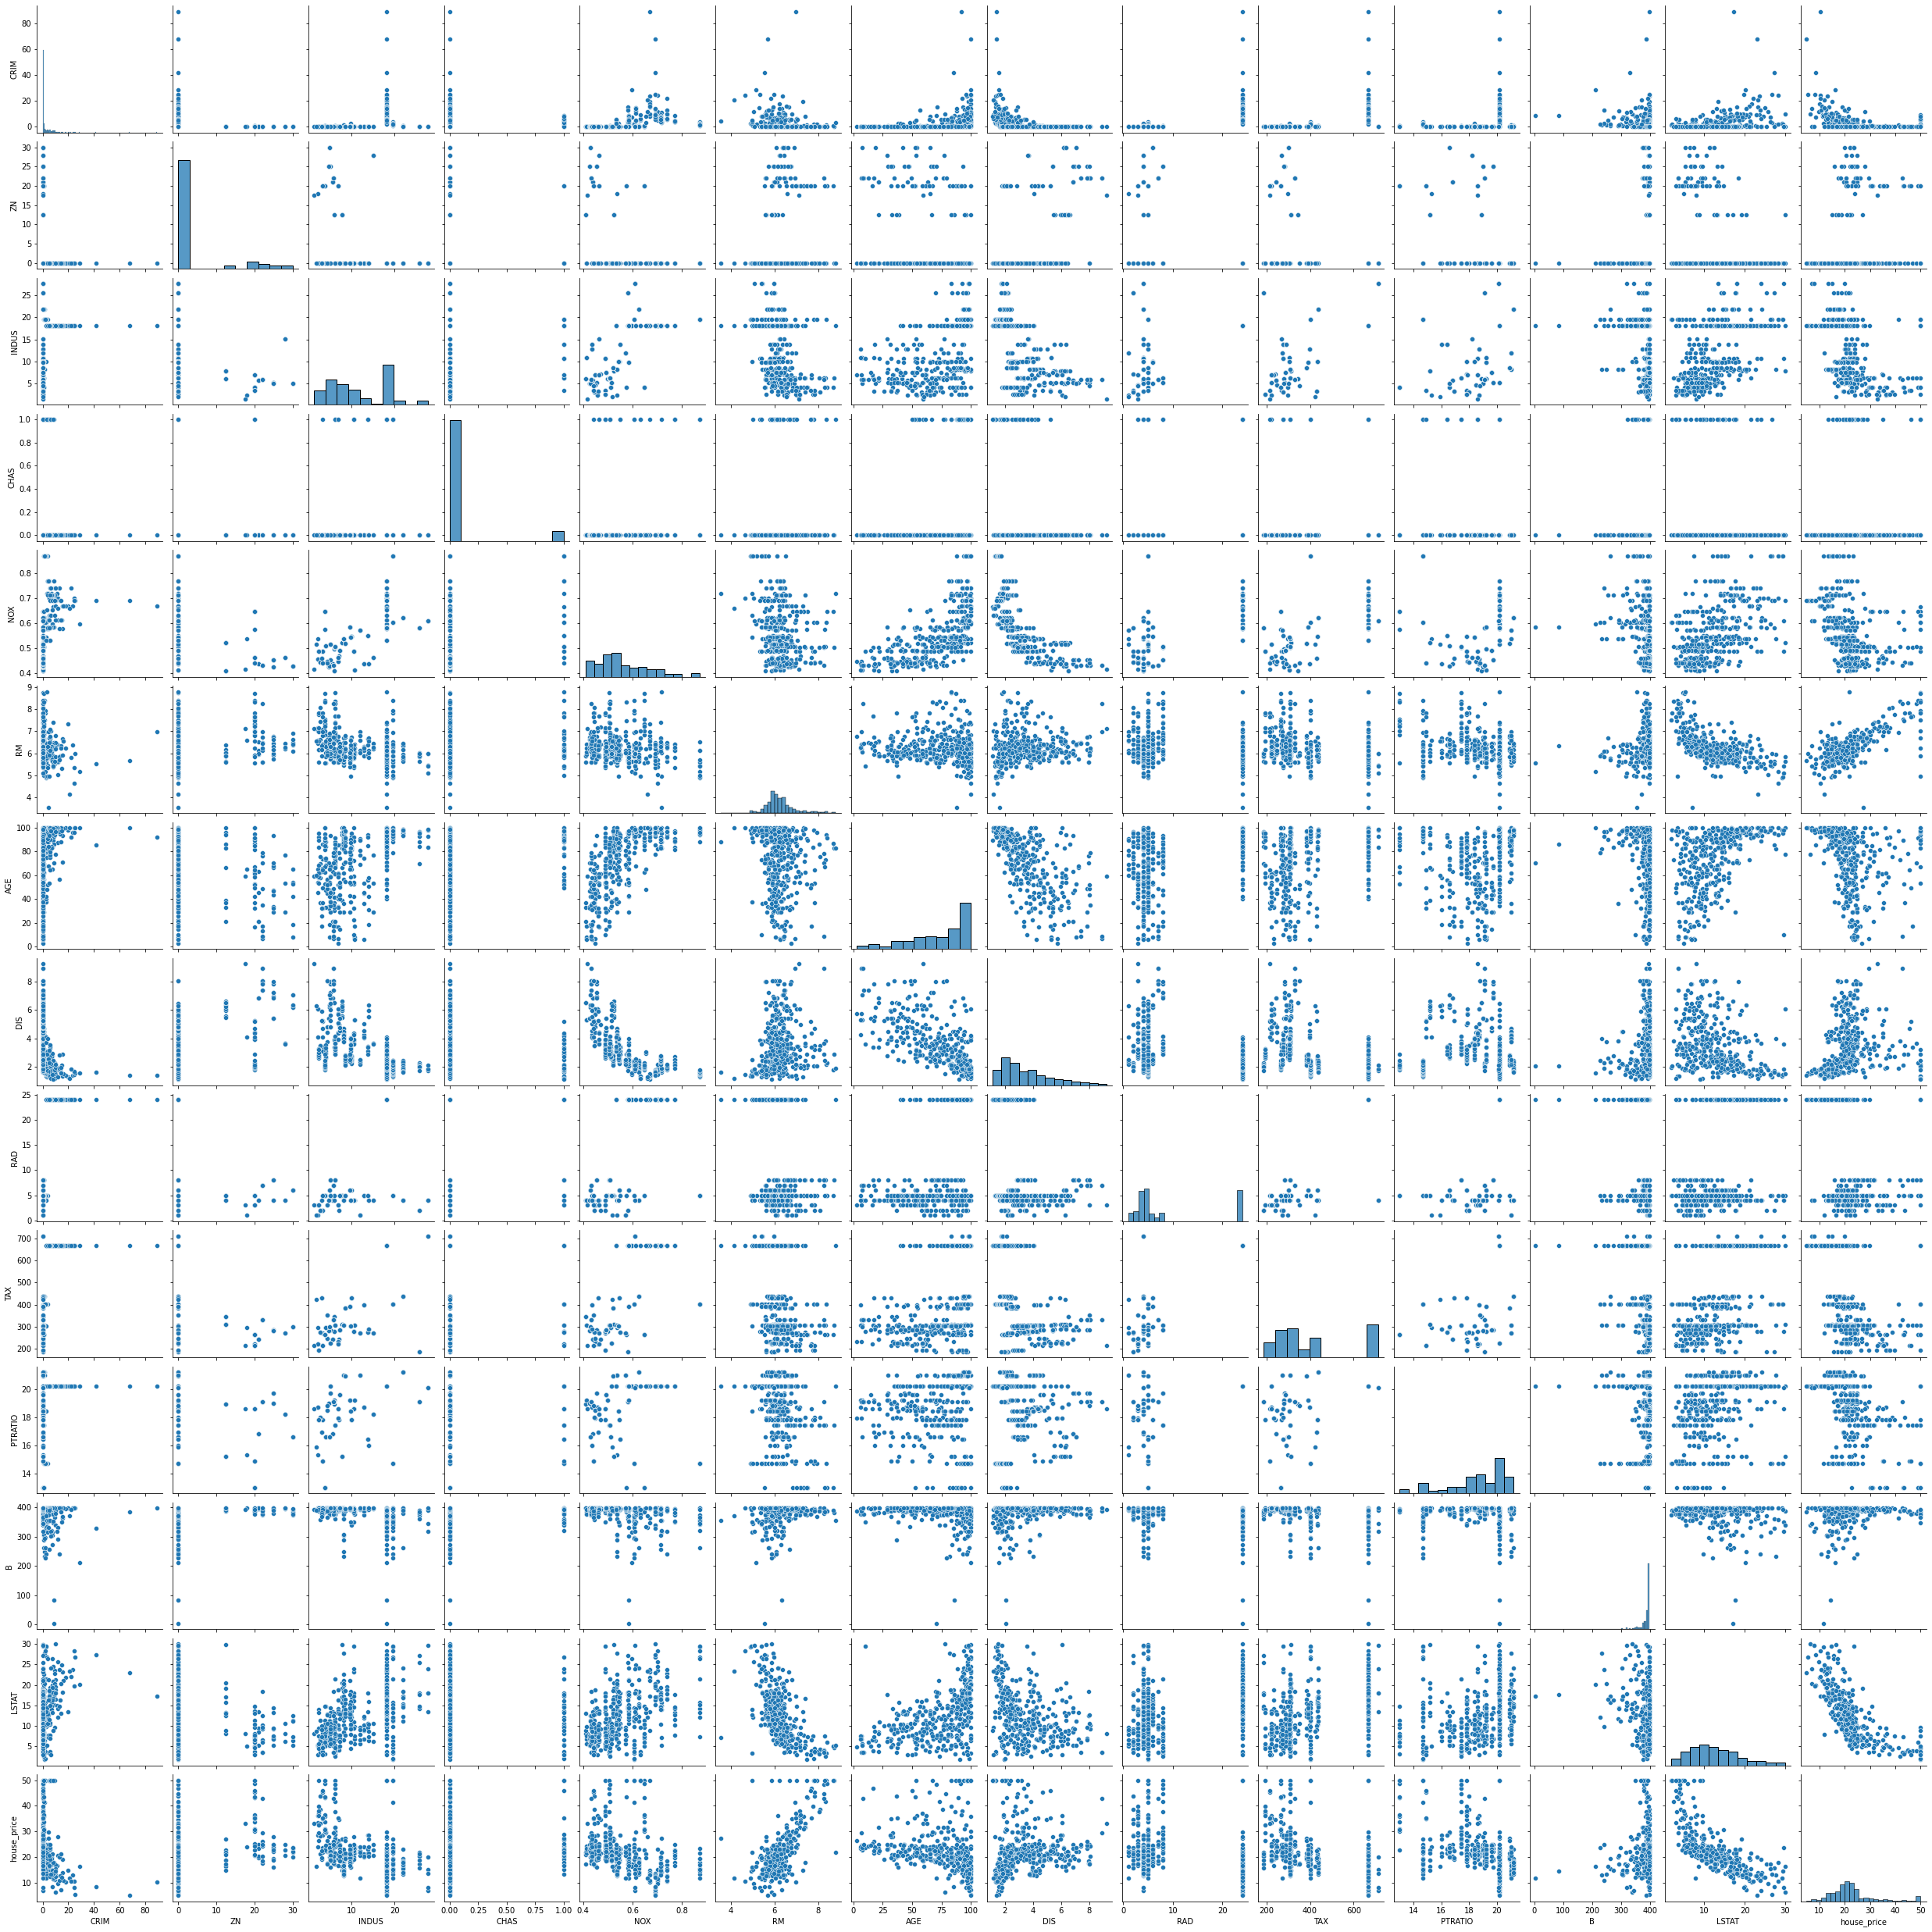

In [27]:
sns.pairplot(data=data,palette='deep',diag_kind='hist')

<AxesSubplot:xlabel='house_price', ylabel='Density'>

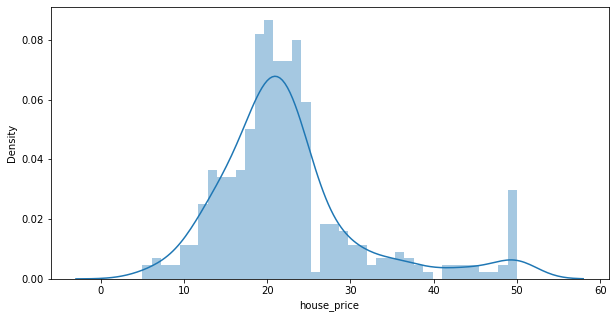

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(data['house_price'], bins=40)


Mean price of housing 22.471025641025665


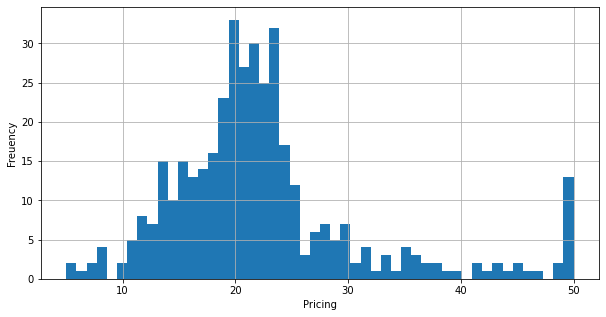

In [29]:
plt.figure(figsize=(10,5))
data['house_price'].hist(bins=50)
plt.xlabel('Pricing')
plt.ylabel('Freuency')
print('Mean price of housing',data['house_price'].mean())

<AxesSubplot:xlabel='NOX', ylabel='house_price'>

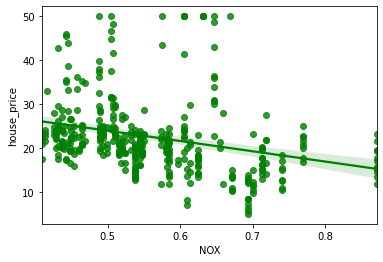

In [30]:
plt.figure(figsize=(6,4))
sns.regplot(x='NOX',y='house_price',data=data,color='green')

As the amount of Nitrous Oxide in the air decreases, we see an increase in the house price.

<AxesSubplot:xlabel='CRIM', ylabel='house_price'>

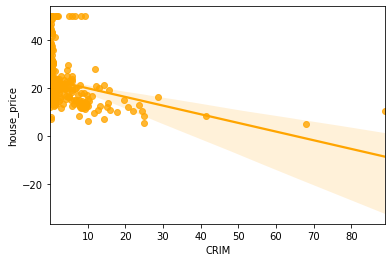

In [31]:
plt.figure(figsize=(6,4))
sns.regplot(x='CRIM',y='house_price',data=data,color='orange')

Housing price increases with a decrease in crime rate.

<AxesSubplot:xlabel='LSTAT', ylabel='house_price'>

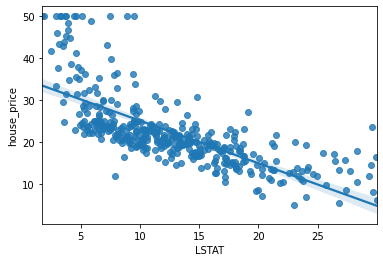

In [32]:
plt.figure(figsize=(6,4))
sns.regplot(x='LSTAT',y='house_price',data=data)

The lower status population amount increases with a drop in house prices.

<AxesSubplot:xlabel='RM', ylabel='house_price'>

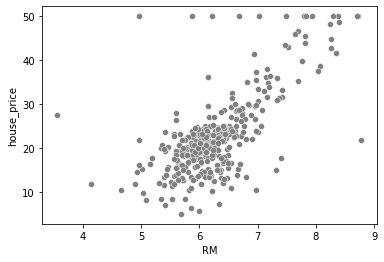

In [33]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='RM',y='house_price',data=data,color='grey')

The house price increases with an increase in the number of rooms.

<AxesSubplot:xlabel='PTRATIO', ylabel='house_price'>

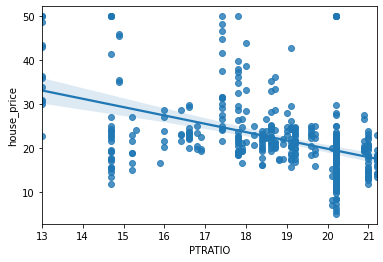

In [34]:
plt.figure(figsize=(6,4))
sns.regplot(x='PTRATIO',y='house_price',data=data)

House price increases with a decrease in the Pupil Teacher Ratio.

<AxesSubplot:xlabel='INDUS', ylabel='house_price'>

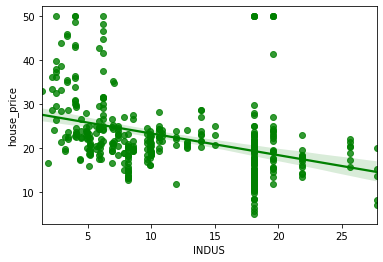

In [35]:
plt.figure(figsize=(6,4))
sns.regplot(x='INDUS',y='house_price',data=data,color='green')

House price increases as the number of industries in the area drops.

In [36]:
x= data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = data['house_price']
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [37]:
x = data.drop('house_price',axis=1)
y = data['house_price']

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(390, 13)
(390,)


### Separating data into training and testing data

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [39]:
#MinMAxScaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Modeling

In [40]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred= linear.predict(x_test)

Text(0, 0.5, 'Predictions')

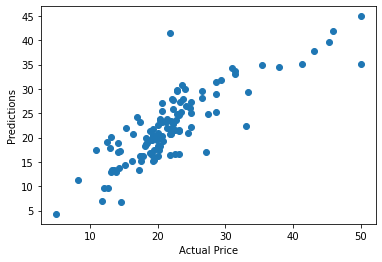

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predictions')

In [52]:
from sklearn import metrics
print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error rate for Test Data is : 

Mean Square Error (MSE)       : 24.556582556962937
Mean Absolute Error           : 3.374022997083994
Root mean Square Error (RMSE) : 4.955459873408616


### Modeling using chosen features

In [53]:

x1 = data[['NOX','RM','CRIM','PTRATIO','LSTAT' ]]
y1 = data['house_price']

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size =0.25 ,random_state = 5 )
print(x_train.shape)
print(x_test.shape)
print(x_train.shape)
print(x_test.shape)

(292, 5)
(98, 5)
(292, 5)
(98, 5)


In [54]:
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [55]:
y_pred= lin.predict(x_test)

Text(0, 0.5, 'Predictions')

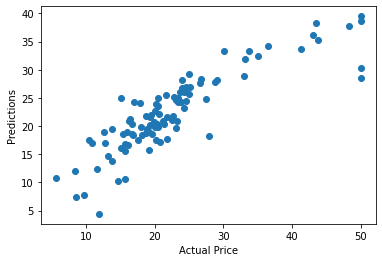

In [56]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predictions')

In [57]:


print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error rate for Test Data is : 

Mean Square Error (MSE)       : 24.556582556962937
Mean Absolute Error           : 3.374022997083994
Root mean Square Error (RMSE) : 4.955459873408616
